In [1]:
# Import necessary libraries with error handling
try:
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LinearRegression, Ridge
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler, PolynomialFeatures
    from sklearn.pipeline import Pipeline
    print("Successfully imported all required libraries.")
except ImportError as e:
    print(f"Error importing libraries: {e}")
    print("Please ensure you have installed all required libraries (pandas, seaborn, matplotlib, scikit-learn).")
    # Exit or handle the error appropriately if libraries are missing
    exit() # Exiting the script if essential libraries are not found


csv_file_path = 'kc_house_data.csv'
try:
    df = pd.read_csv(csv_file_path)
    print(f"Successfully loaded data from '{csv_file_path}'.")
except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found.")
    print("Please ensure the CSV file is in the correct directory or provide the full path.")
    # Exit or handle the error appropriately if the file is not found
    exit()
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")
    # Exit or handle other potential errors during file reading
    exit()

Successfully imported all required libraries.
Successfully loaded data from 'kc_house_data.csv'.


In [2]:
# Task 1: Display the data types of each column using the attribute dtypes
print("--- Task 1: Displaying Data Types ---")
print(df.dtypes)

--- Task 1: Displaying Data Types ---
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [3]:
#Task 2: Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(),
# then use the method describe() to obtain a statistical summary of the data.
# Make sure the inplace parameter is set to True.
print("--- Task 2: Dropping Columns and Displaying Statistical Summary ---")
# Check if columns exist before dropping to avoid errors
columns_to_drop = []
if 'id' in df.columns:
    columns_to_drop.append('id')
if 'Unnamed: 0' in df.columns:
    columns_to_drop.append('Unnamed: 0')

if columns_to_drop:
    df.drop(columns_to_drop, axis=1, inplace=True)
    print(f"Dropped columns: {columns_to_drop}")
else:
    print("Columns 'id' and 'Unnamed: 0' not found, no columns dropped.")

# Display statistical summary
print("\nStatistical Summary after dropping columns:")
print(df.describe())

--- Task 2: Dropping Columns and Displaying Statistical Summary ---
Dropped columns: ['id']

Statistical Summary after dropping columns:
              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000

In [4]:
# Task 3: Use the method value_counts to count the number of houses with unique floor values,
# and use the method to_frame() to convert it to a data frame.
print("--- Task 3: Value Counts for 'floors' ---")
floor_counts = df['floors'].value_counts().to_frame()
print("Value counts for 'floors':")
print(floor_counts)

--- Task 3: Value Counts for 'floors' ---
Value counts for 'floors':
        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


--- Task 4: Generating Boxplot for Price vs Waterfront ---


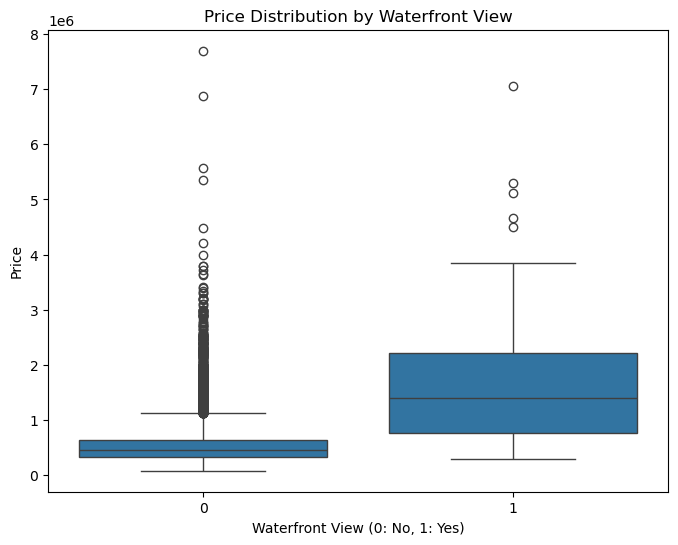

In [5]:
# Task 4: Use the function boxplot in the seaborn library to produce a plot that can help determine
# whether houses with a waterfront view or without a waterfront view have more price outliers.
print("--- Task 4: Generating Boxplot for Price vs Waterfront ---")
plt.figure(figsize=(8, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price Distribution by Waterfront View')
plt.xlabel('Waterfront View (0: No, 1: Yes)')
plt.ylabel('Price')
plt.show()

--- Task 5: Generating Regplot for Price vs Sqft Above ---


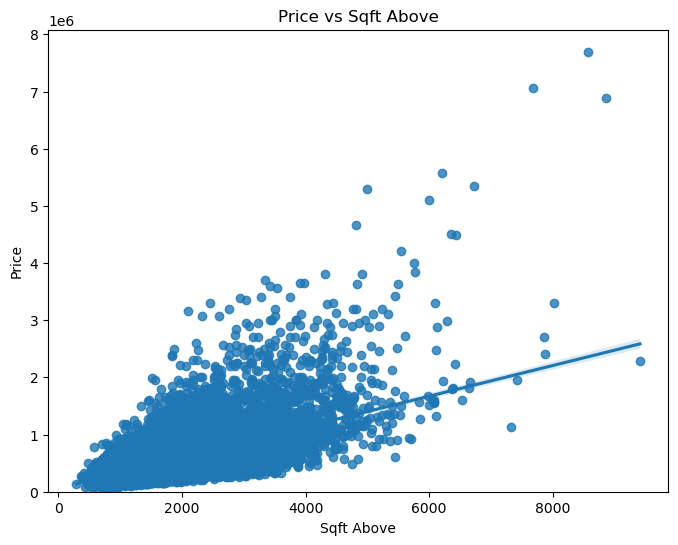

In [6]:
# Task 5: Use the function regplot in the seaborn library to determine if the feature sqft_above
# is negatively or positively correlated with price.
print("--- Task 5: Generating Regplot for Price vs Sqft Above ---")
plt.figure(figsize=(8, 6))
sns.regplot(x='sqft_above', y='price', data=df)
plt.title('Price vs Sqft Above')
plt.xlabel('Sqft Above')
plt.ylabel('Price')
plt.ylim(0,) # Ensure price starts at 0 on the y-axis
plt.show()

In [7]:
# Task 6: Fit a linear regression model to predict the price using the feature 'sqft_living',
# then calculate the R^2.
print("--- Task 6: Linear Regression with sqft_living and calculating R^2 ---")
X_sqft_living = df[['sqft_living']] # Features must be in a DataFrame
Y_price = df['price']

lm_sqft_living = LinearRegression()
lm_sqft_living.fit(X_sqft_living, Y_price)

r_squared_sqft_living = lm_sqft_living.score(X_sqft_living, Y_price)

print(f'R^2 for Linear Regression (sqft_living vs price): {r_squared_sqft_living}')

--- Task 6: Linear Regression with sqft_living and calculating R^2 ---
R^2 for Linear Regression (sqft_living vs price): 0.4928532179037931


In [8]:
# Task 7: Fit a linear regression model to predict the 'price' using the list of features...
# Calculate the R^2.
print("--- Task 7: Linear Regression with multiple features and calculating R^2 ---")
features_multi = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

X_multi = df[features_multi]
Y_multi = df['price']

lm_multi = LinearRegression()
lm_multi.fit(X_multi, Y_multi)

r_squared_multi = lm_multi.score(X_multi, Y_multi)

print(f'R^2 for Linear Regression ({len(features_multi)} features vs price): {r_squared_multi}')

--- Task 7: Linear Regression with multiple features and calculating R^2 ---
R^2 for Linear Regression (11 features vs price): 0.6577151058279327


In [9]:
# Task 8: Create a pipeline object that scales the data, performs a polynomial transform,
# and fits a linear regression model. Fit the object using the features in the question above,
# then fit the model and calculate the R^2.
print("--- Task 8: Pipeline with Scaling, Polynomial Transform, and Linear Regression ---")
features_pipe = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

X_pipe = df[features_pipe]
Y_pipe = df['price']

# Define the pipeline steps
# Using degree=2 for the polynomial transform (common choice)
Input_pipe=[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', LinearRegression())]

# Create the pipeline
pipe = Pipeline(Input_pipe)

# Fit the pipeline to the data
pipe.fit(X_pipe, Y_pipe)

# Calculate R^2 using the fitted pipeline
r_squared_pipe = pipe.score(X_pipe, Y_pipe)

print(f'R^2 for Pipeline (Scaled, Poly Degree 2, Linear Reg) on Training Data: {r_squared_pipe}')

--- Task 8: Pipeline with Scaling, Polynomial Transform, and Linear Regression ---
R^2 for Pipeline (Scaled, Poly Degree 2, Linear Reg) on Training Data: 0.7513467656307783


In [10]:
# Task 9: Create and fit a Ridge regression object using the training data,
# setting the regularization parameter to 0.1, and calculate the R^2 using the test data.
print("--- Task 9: Ridge Regression (alpha=0.1) on Training/Test Data ---")
features_ridge = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

X_ridge = df[features_ridge]
Y_ridge = df['price']

# Split data into training and testing sets
# Using a fixed random_state for reproducibility
X_train_r, X_test_r, Y_train_r, Y_test_r = train_test_split(X_ridge, Y_ridge, test_size=0.2, random_state=1)

# Create and fit the Ridge model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_r, Y_train_r)

# Calculate R^2 on the test data
r_squared_ridge_test = ridge_model.score(X_test_r, Y_test_r)

print(f'R^2 for Ridge (alpha=0.1) on Test Data: {r_squared_ridge_test}')

--- Task 9: Ridge Regression (alpha=0.1) on Training/Test Data ---
R^2 for Ridge (alpha=0.1) on Test Data: 0.6460194468601673


In [11]:
# Task 10: Perform a second-order polynomial transform on both the training data and testing data.
# Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1.
# Calculate the R^2 utilizing the test data provided.
print("--- Task 10: Ridge Regression (alpha=0.1) with 2nd-order Polynomial on Training/Test Data ---")
features_poly_ridge = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

X_poly_ridge = df[features_poly_ridge]
Y_poly_ridge = df['price']

# Split data into training and testing sets
X_train_pr, X_test_pr, Y_train_pr, Y_test_pr = train_test_split(X_poly_ridge, Y_poly_ridge, test_size=0.2, random_state=1)

# Create Polynomial Features transformer
pr = PolynomialFeatures(degree=2)

# Fit and transform training data
X_train_pr_poly = pr.fit_transform(X_train_pr)

# Transform test data using the *same* fitted transformer
X_test_pr_poly = pr.transform(X_test_pr)

# Create and fit the Ridge model on the polynomial-transformed training data
ridge_model_poly = Ridge(alpha=0.1)
ridge_model_poly.fit(X_train_pr_poly, Y_train_pr)

# Calculate R^2 on the polynomial-transformed test data
r_squared_ridge_poly_test = ridge_model_poly.score(X_test_pr_poly, Y_test_pr)

print(f'R^2 for Ridge (alpha=0.1) with Poly Degree 2 on Test Data: {r_squared_ridge_poly_test}')

--- Task 10: Ridge Regression (alpha=0.1) with 2nd-order Polynomial on Training/Test Data ---
R^2 for Ridge (alpha=0.1) with Poly Degree 2 on Test Data: 0.7546208817491002
